# 1. A sphere on a cube

Create a 3D picture like this

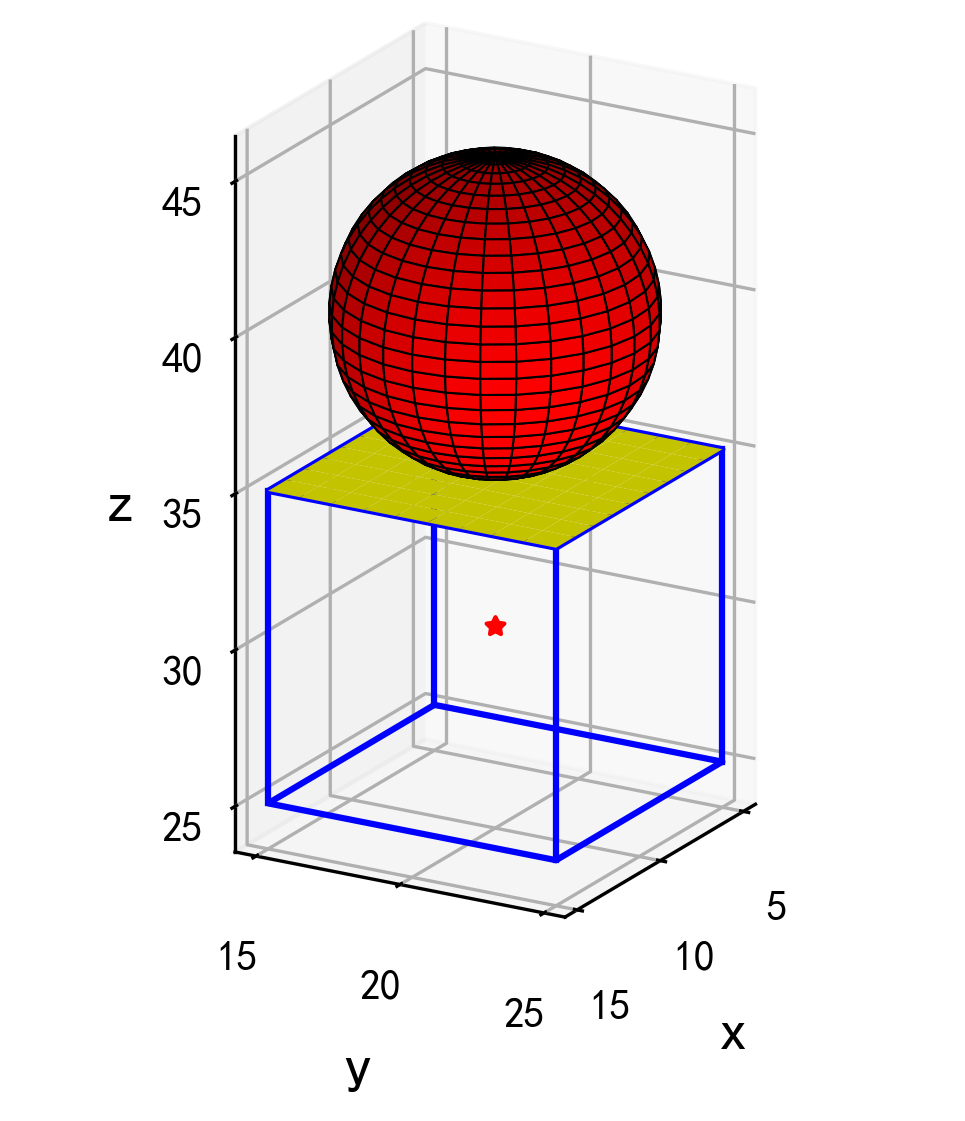

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import MultipleLocator
import numpy as np


#%% initialization
# %matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure(dpi = 300)
ax = fig.add_subplot(1, 1, 1, projection='3d',proj_type='ortho')
ax.set_box_aspect((1, 1, 2))


#%% blue cube
x, y, z =5, 15, 25 
dx, dy, dz = 10, 10, 10
color = 'blue'


xx = [x, x, x+dx, x+dx, x]
yy = [y, y+dy, y+dy, y, y]
kwargs = {'alpha': 1, 'color': color}
ax.plot3D(xx, yy, [z]*5, **kwargs)
ax.plot3D(xx, yy, [z+dz]*5, **kwargs)
ax.plot3D([x, x], [y, y], [z, z+dz], **kwargs)
ax.plot3D([x, x], [y+dy, y+dy], [z, z+dz], **kwargs)
ax.plot3D([x+dx, x+dx], [y+dy, y+dy], [z, z+dz], **kwargs)
ax.plot3D([x+dx, x+dx], [y, y], [z, z+dz], **kwargs)

#%% yellow surface

x = np.linspace(5, 15, 10)
y = np.linspace(15, 25, 10)
X, Y = np.meshgrid(x, y)

ax.plot_surface(X,Y,Z=X*0+35,color='yellow') 


#%% red sphere


def get_sphere(x, y, z, r, dense):

    t = np.linspace(0, np.pi * 2, dense)
    s = np.linspace(0, np.pi, dense)
    t, s = np.meshgrid(t, s)             
    x = x + r * np.sin(s) * np.cos(t)    
    y = y + r * np.sin(s) * np.sin(t)
    z = z + r * np.cos(s)
    return x, y, z

xx, yy, zz = get_sphere(x=10, y=20, z=40, r=5, dense=30)

surf = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1,color = 'r',linewidth = 0.5)
surf.set_edgecolors("black")


#%% red star

x, y, z = 10, 20, 30
ax.scatter3D(x,y,z,marker=(5,1),color = 'red')


#%% figure set up

# axis
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('z',fontsize=14)

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.zaxis.set_tick_params(labelsize=10)

x_major_locator=MultipleLocator(5)
y_major_locator=MultipleLocator(5)
z_major_locator=MultipleLocator(5)


ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
ax.zaxis.set_major_locator(z_major_locator)

# view angle
theta=20; alpha=30
ax.view_init (theta, alpha)


plt.show()


# 2. Taubin’s heart equation

Taubin’s heart equation is defined as



$ (x^2 + \frac{9}{4} y^2 + z^2 -1)^3 - x^2 z^3 - \frac{9}{80} y^2 z^3 = 0$

Create its 3D plot like Figure 2 with skimage.measure.marching_cubes. Install skimage first if you do not have it. The “marching cubes” algorithm approximates the surface of a
given 3-dimensional dataset with many triangles.

The 3D heart is the graphical solution of the heart equation. It is visualized with the marching cubes algorithm. Its colours are just added for
beauty. The 2D heart on the 𝑥𝑧-plane is the cross-section of the 3D heart at 𝑦 = 0.

C:\Users\Grain\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 10086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Grain\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 10086 missing from current font.
  font.set_text(s, 0, flags=flags)


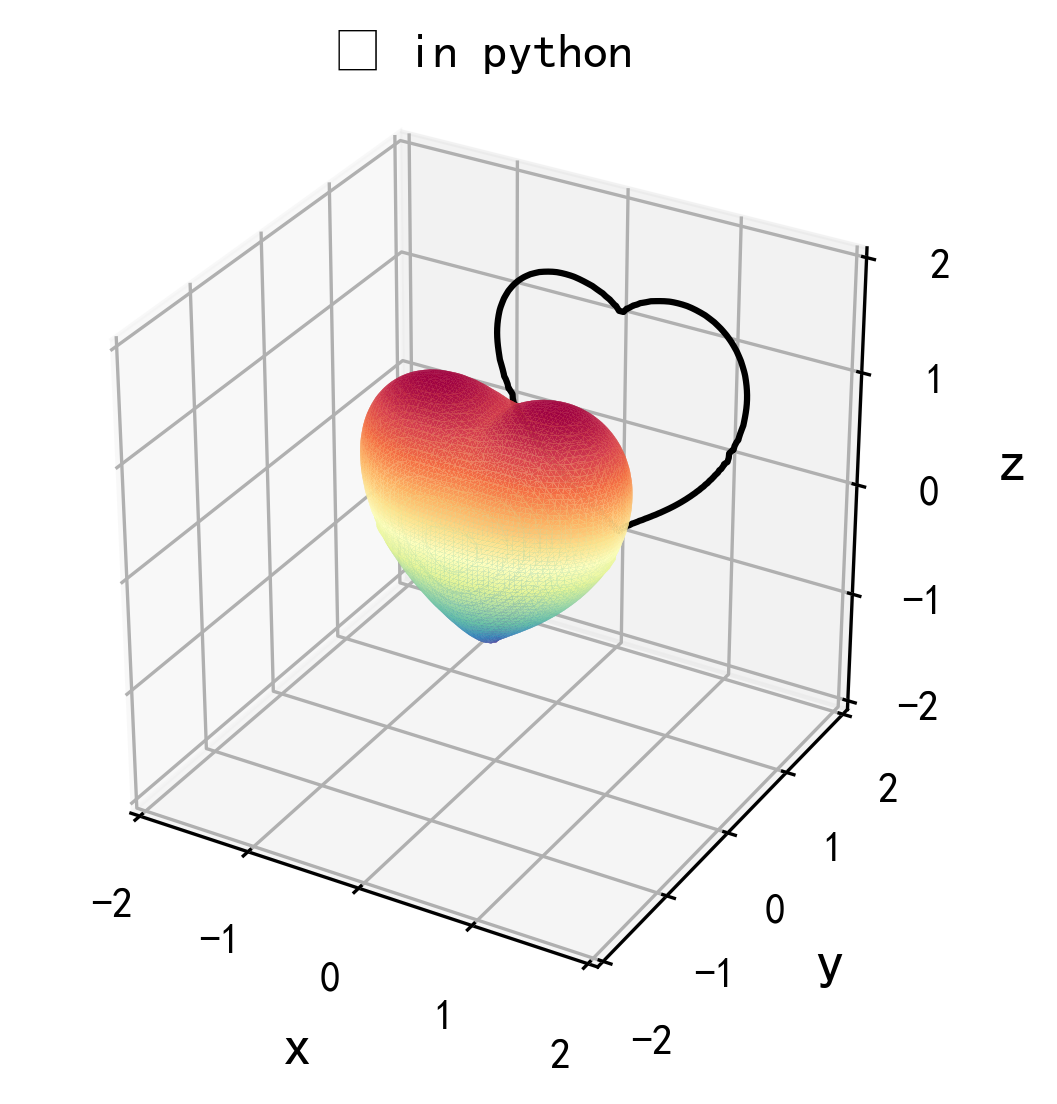

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 18 12:46:48 2022

@author: Grain
"""

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import MultipleLocator
import numpy as np


def heart(x, y, z):
    """ The Taubin's heart function. """
    return ( (x**2 + 9/4*y**2 + z**2 - 1)**3
            - x**2*z**3 - 9/80*y**2*z**3 )

""" Consider a region: lims[0] <= x, y, z <= # lims[1]
    Divide x, y, z into n points each, then
    calculate H = heart(x, y, z) in the region. """



n = 100
lims = [-2, 2]

x = np.linspace(lims[0], lims[1], n)
y = np.linspace(lims[0], lims[1], n)
z = np.linspace(lims[0], lims[1], n)



X,Y,Z = np.meshgrid(x,y,z)

# for i in range(len(X)):
#     if abs(H(X[i],Y[i],Z[i]) 
H = heart(X, Y, Z)

""" Use the marching cubes algorithm to solve
    the surface of H = heart(x, y, z) = level. """


from skimage.measure import marching_cubes
verts, faces = marching_cubes(H, level=0)[:2]

""" verts = a  V*3 array
    faces = an F*3 array
    The algorithm forms F triangles by joining V vertices.
    
    For example, if faces[f] = [a, b, c],
    the f-th triangle is formed by joining
    verts[a], verts[b], and verts[c].
        
    If verts[v] = [i, j, k], the v-th vertex's
    coordinates are (x[j], y[i], z[k]).
    Note that the x-coordinate uses j
    and the y-coordinate uses i.
    
    However, [i, j, k] may not be integers,
    so you need to scale the them linearly.
    For example, if verts[v, 2] = 12.3,
    the v-the vertex's actual z-coordinate is
        z[floor(12.3)] * (1-0.3) + z[ceil(12.3)] * 0.3
    
    Now, calculate the vertices' coordinates.
    Follow the index of convetion of verts, so
    coords[:, 1] = x-coordinates and coords[:, 0] = y-coordinates """
coords = verts



vertsfloor=np.floor(verts).astype(int)
vertsceil=np.ceil(verts).astype(int)
coords[:,1]=x[vertsfloor[:,1]]*(1-verts[:,1]+vertsfloor[:,1])+x[vertsceil[:,1]]*(verts[:,1]-vertsfloor[:,1])#x coordinates
coords[:,0]=y[vertsfloor[:,0]]*(1-verts[:,0]+vertsfloor[:,0])+y[vertsceil[:,0]]*(verts[:,0]-vertsfloor[:,0])#y coordinates
coords[:,2]=z[vertsfloor[:,2]]*(1-verts[:,2]+vertsfloor[:,2])+z[vertsceil[:,2]]*(verts[:,2]-vertsfloor[:,2])#z coordinates


""" Plot the data on a 3D Axes with ax.plot_trisurf().
    For the title, the Unicode of the heart symbol is U+2661 """
fig = plt.figure(dpi = 300)
ax = plt.axes (projection='3d')    


plt.rcParams['font.sans-serif']=['SimHei'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually


ax.set_box_aspect((1, 1, 1))
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('z',fontsize=14)

ax.set_title(u'\u2766' + ' in python')
# You do not need to edit this line.
ax.plot_trisurf(coords[:, 1], coords[:, 0], 
                faces, coords[:, 2], cmap='Spectral_r')

# """ Finally, compute the heart's cross-section at y=0
#     and plot it with ax.contour().
#     You will probably need to use the listed parameters. """
# cross = heart(X, 0, Y) 

cross=heart(X,np.zeros(n),Y)
cross1 = np.transpose(cross[:,:,0])
#cross1=cross.reshape((100,100))
xx=np.zeros((100,100))
zz=np.zeros((100,100))
for i in range(100):
    xx[:,i]=x
    zz[i,:]=y
ax.contour(X[0,:,:],cross1,Z[0,:,:], zdir='y',offset=2,levels=[0],colors=['black'])





# 3. Sine and cosine

Create an MP4 video like the one shown on p.21 of the notes of Lecture 9.

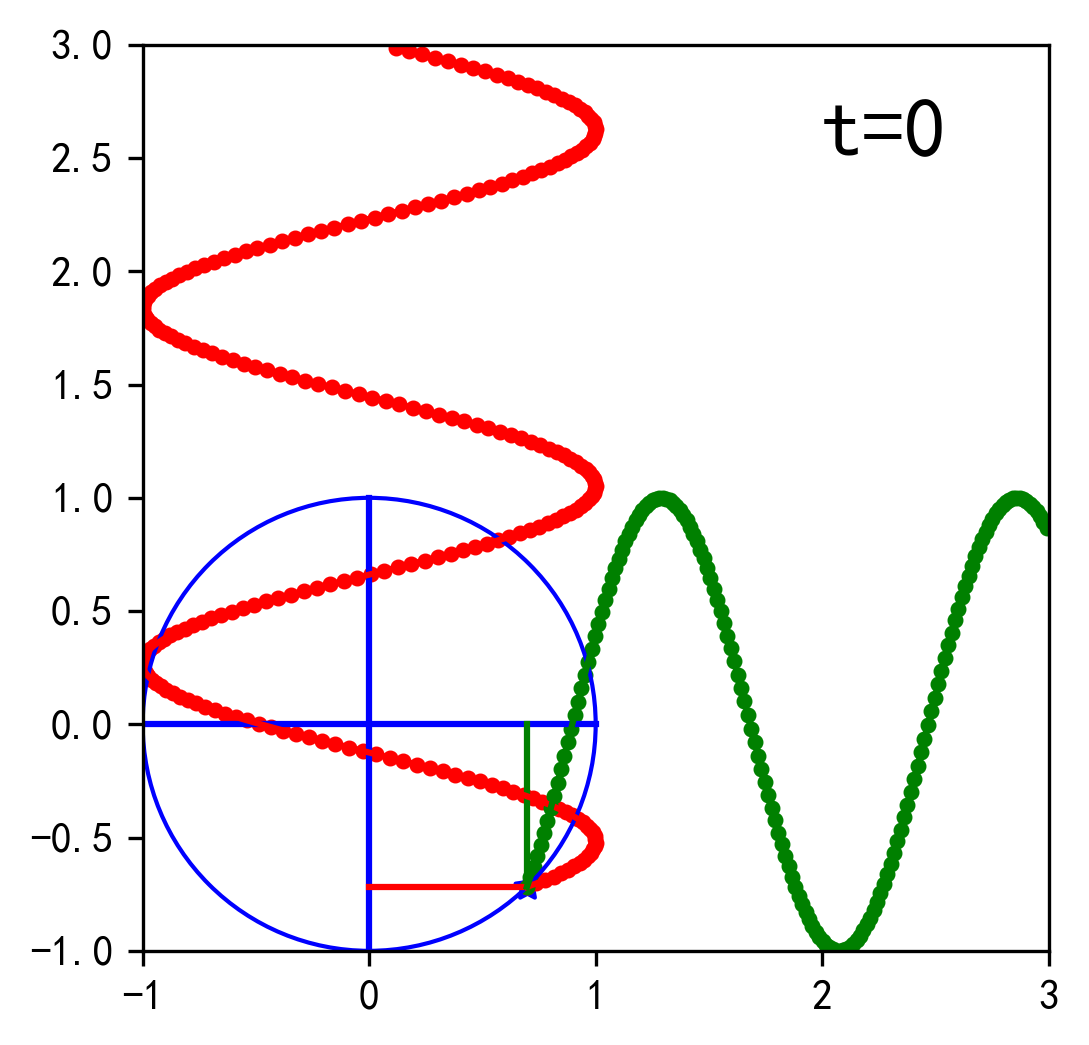

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 18 16:37:47 2022

@author: Grain
"""
from matplotlib.animation import FuncAnimation
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np

t = 0.2


r = 1
w = -4 #angle velocity
theta = w * t
theta0 = 0


fig = plt.figure(dpi = 300)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.xlim(-1,3)
plt.ylim(-1,3)
# 

circle = plt.Circle((0, 0), r, color='b', fill=False)
plt.gcf().gca().add_artist(circle)

plt.plot([0,0],[-1,1],color = 'blue')
plt.plot([-1,1],[0,0],color = 'blue')


cur_x = r * np.cos(theta)
cur_y = r * np.sin(theta)

plt.scatter(cur_x,cur_y,marker=(5,1),color = 'blue')

#red line
plt.plot([0,cur_x],[cur_y,cur_y], color = 'red')

#green line
plt.plot([cur_x,cur_x],[cur_y,0], color = 'green')

red_Y = np.arange(cur_y, 3, 0.015)
red_X = np.cos((red_Y - cur_y) * w - theta)

green_X = np.arange(cur_x, 3, 0.015)
green_Y = - np.sin((green_X - cur_x) * w  - theta) 

plt.plot(red_X,red_Y,color = 'red')
plt.scatter(red_X,red_Y,s = 8,color = 'red')
plt.plot(green_X,green_Y,color = 'green')
plt.scatter(green_X,green_Y,s = 8,color = 'green')
plt.text(2, 2.5, 't=%d'%(t),fontsize = 20)
plt.show()



